In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
df = pd.read_csv('C:/Users/Michael/Documents/ml_zc/datosObtenidos/geoespaciales.csv')
nbi = pd.read_excel('C:/Users/Michael/Documents/ml_zc/datosObtenidos/NBI_parroquia.xlsx', sheet_name='data', dtype={'ADM3_PCODE': str})

In [3]:
# Homologar códigos
df['ADM3_PCODE'] = df['ADM3_PCODE'].str.replace('EC', '', regex=False)
df22 = df[df['Año']==2022]
consolidada = pd.merge(df22, nbi, how='left', on=['ADM3_PCODE'])

# estandarizar nombres usados en el artículo
consolidada = consolidada.rename(columns={'avg_rad_max': 'viirs', 'm2': 'm2_auo', 'edificaciones': 'edi', 'carreteras': 'crts', 
                                          'densidad': 'dt', 'numero_componentes': 'ct', 'densidad_servicios': 'ds', 'numero_componentes_servicios':'cs', 
                                          'num_red_agua': 'nra', 'educativos': 'edu', 'avg_ndvi': 'ndvi', 'avg_mndwi': 'mndwi'})

In [4]:
consolidada.shape

(1041, 23)

In [5]:
consolidada

,ADM3_PCODE,Año,viirs,pop,m2_auo,edi,crts,dt,ct,ds,...,ndvi,mndwi,area,icl,Provincia,Cantón,Parroquia,Personas,No pobres,Pobres
0,010150,2022,66.805288,378564,5.978417e+07,5319.0,14275.0,0.000054,197.0,0.015504,...,0.276570,-0.303005,7.148434e+07,1.983480e+04,Azuay,Cuenca,Cuenca,360524,324820,35704
1,010151,2022,2.126417,22812,2.371199e+06,345.0,581.0,0.000195,53.0,0.017241,...,0.494996,-0.386760,2.514428e+08,6.406692e+03,Azuay,Cuenca,Baños,21783,15591,6192
2,010152,2022,3.060251,6749,0.000000e+00,17.0,233.0,0.000354,14.0,0.000000,...,0.565185,-0.365125,7.508753e+07,0.000000e+00,Azuay,Cuenca,Cumbe,6455,2832,3623
3,010153,2022,0.678795,1801,0.000000e+00,0.0,100.0,0.000230,12.0,0.000000,...,0.470111,-0.310931,3.800021e+08,NaN,Azuay,Cuenca,Chaucha,1720,540,1180
4,010154,2022,1.252252,3349,9.911728e+05,8.0,147.0,0.000503,3.0,0.068783,...,0.465710,-0.400764,1.108470e+08,4.632720e+05,Azuay,Cuenca,Checa,3184,2157,1027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,240350,2022,27.945984,36598,1.399157e+07,132.0,793.0,0.000949,6.0,0.111111,...,0.018730,-0.081029,1.712493e+07,8.093841e+05,Santa Elena,Salinas,Salinas,35048,22347,12701
1037,240351,2022,9.731164,15703,1.441084e+06,0.0,259.0,0.001385,5.0,0.064516,...,0.077736,-0.268369,1.498181e+07,inf,Santa Elena,Salinas,Anconcito,15047,7184,7863
1038,240352,2022,14.754003,38386,9.579241e+06,25.0,818.0,0.000535,20.0,0.036364,...,0.078913,-0.146293,3.569570e+07,1.472747e+06,Santa Elena,Salinas,José Luis Tamayo,36660,19498,17162
1039,010951,2022,0.948494,1711,0.000000e+00,0.0,64.0,0.000752,3.0,0.000000,...,0.487555,-0.314724,1.257345e+08,NaN,Azuay,Sígsig,Cuchil,1638,974,664


In [6]:
consolidada.columns

Index(['ADM3_PCODE', 'Año', 'viirs', 'pop', 'm2_auo', 'edi', 'crts', 'dt',
       'ct', 'ds', 'cs', 'nra', 'edu', 'ndvi', 'mndwi', 'area', 'icl',
       'Provincia', 'Cantón', 'Parroquia', 'Personas', 'No pobres', 'Pobres'],
      dtype='object')

In [7]:
# Calculamos el % nbi
consolidada = consolidada.copy()
consolidada['nbi'] = consolidada['Pobres']/consolidada['Personas']

# Calculamos área urbana ocupada
consolidada['area_urb_ocupada'] = consolidada['m2_auo']/consolidada['area']

# Ajustemos los VIIR de cm^2 a m^2 y relativizamos la actividad lumínica con Suiza
consolidada['viirs_m2'] = consolidada['viirs']*1e4

In [8]:
# Ver cuál es la admistración 3 de Suiza con el que se relativizará
# suiza.sort_values(by='avg_rad_max', ascending=False)

# Cargar shapefile local
# shapefile_path = "C:/Users/Michael/Documents/ml_zc/gadm41_CHE_3.json/gadm41_CHE_3.json"

# Los datos de Suiza se obtuvieron en: https://data.humdata.org/dataset/whosonfirst-data-admin-che

# gdf = gpd.read_file(shapefile_path)

# gdf[gdf['GID_3']=='CHE.26.13.29_1']

In [9]:
# Necesito restringir mi análisis a datos que existan
consolidada = consolidada[(consolidada['m2_auo'] > 0) & (consolidada['edi'] > 0) & (consolidada['edu'] > 0) & (consolidada['ds'] > 0)]

# y llenamos los nas con 0s
consolidada = consolidada.fillna(0)

# Descriptivos

In [10]:
variables_a_revisar = ['nbi', 'pop', 'area_urb_ocupada', 'crts', 'edi', 'dt', 'ct', 'ds', 'cs', 'nra', 'edu', 'ndvi', 'mndwi']
consolidada[variables_a_revisar].describe()

,nbi,pop,area_urb_ocupada,crts,edi,dt,ct,ds,cs,nra,edu,ndvi,mndwi
count,123.000000,1.230000e+02,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,123.000000,123.000000,123.000000
mean,0.436618,8.790159e+04,0.141278,2073.723577,3255.130081,0.001495,40.414634,0.148009,2.707317,0.0,26.276423,0.328822,-0.208714
std,0.207904,3.045233e+05,0.238110,6886.034814,8901.088098,0.011237,123.072145,0.247284,3.335678,0.0,66.633116,0.206538,0.125812
min,0.094918,4.430000e+02,0.000027,4.000000,1.000000,0.000010,1.000000,0.001900,1.000000,0.0,1.000000,0.000000,-0.428526
25%,0.276978,9.130000e+03,0.005705,329.500000,29.000000,0.000160,9.000000,0.020323,1.000000,0.0,3.000000,0.169681,-0.297258
50%,0.413288,2.328900e+04,0.026932,643.000000,233.000000,0.000356,14.000000,0.055556,1.000000,0.0,7.000000,0.348262,-0.253661
75%,0.598695,5.287450e+04,0.130828,1281.500000,1221.500000,0.000623,32.000000,0.138095,3.000000,0.0,16.000000,0.487752,-0.129951
max,0.974007,2.792588e+06,0.994587,68586.000000,51099.000000,0.125000,1257.000000,1.000000,23.000000,0.0,519.000000,0.708302,0.084343


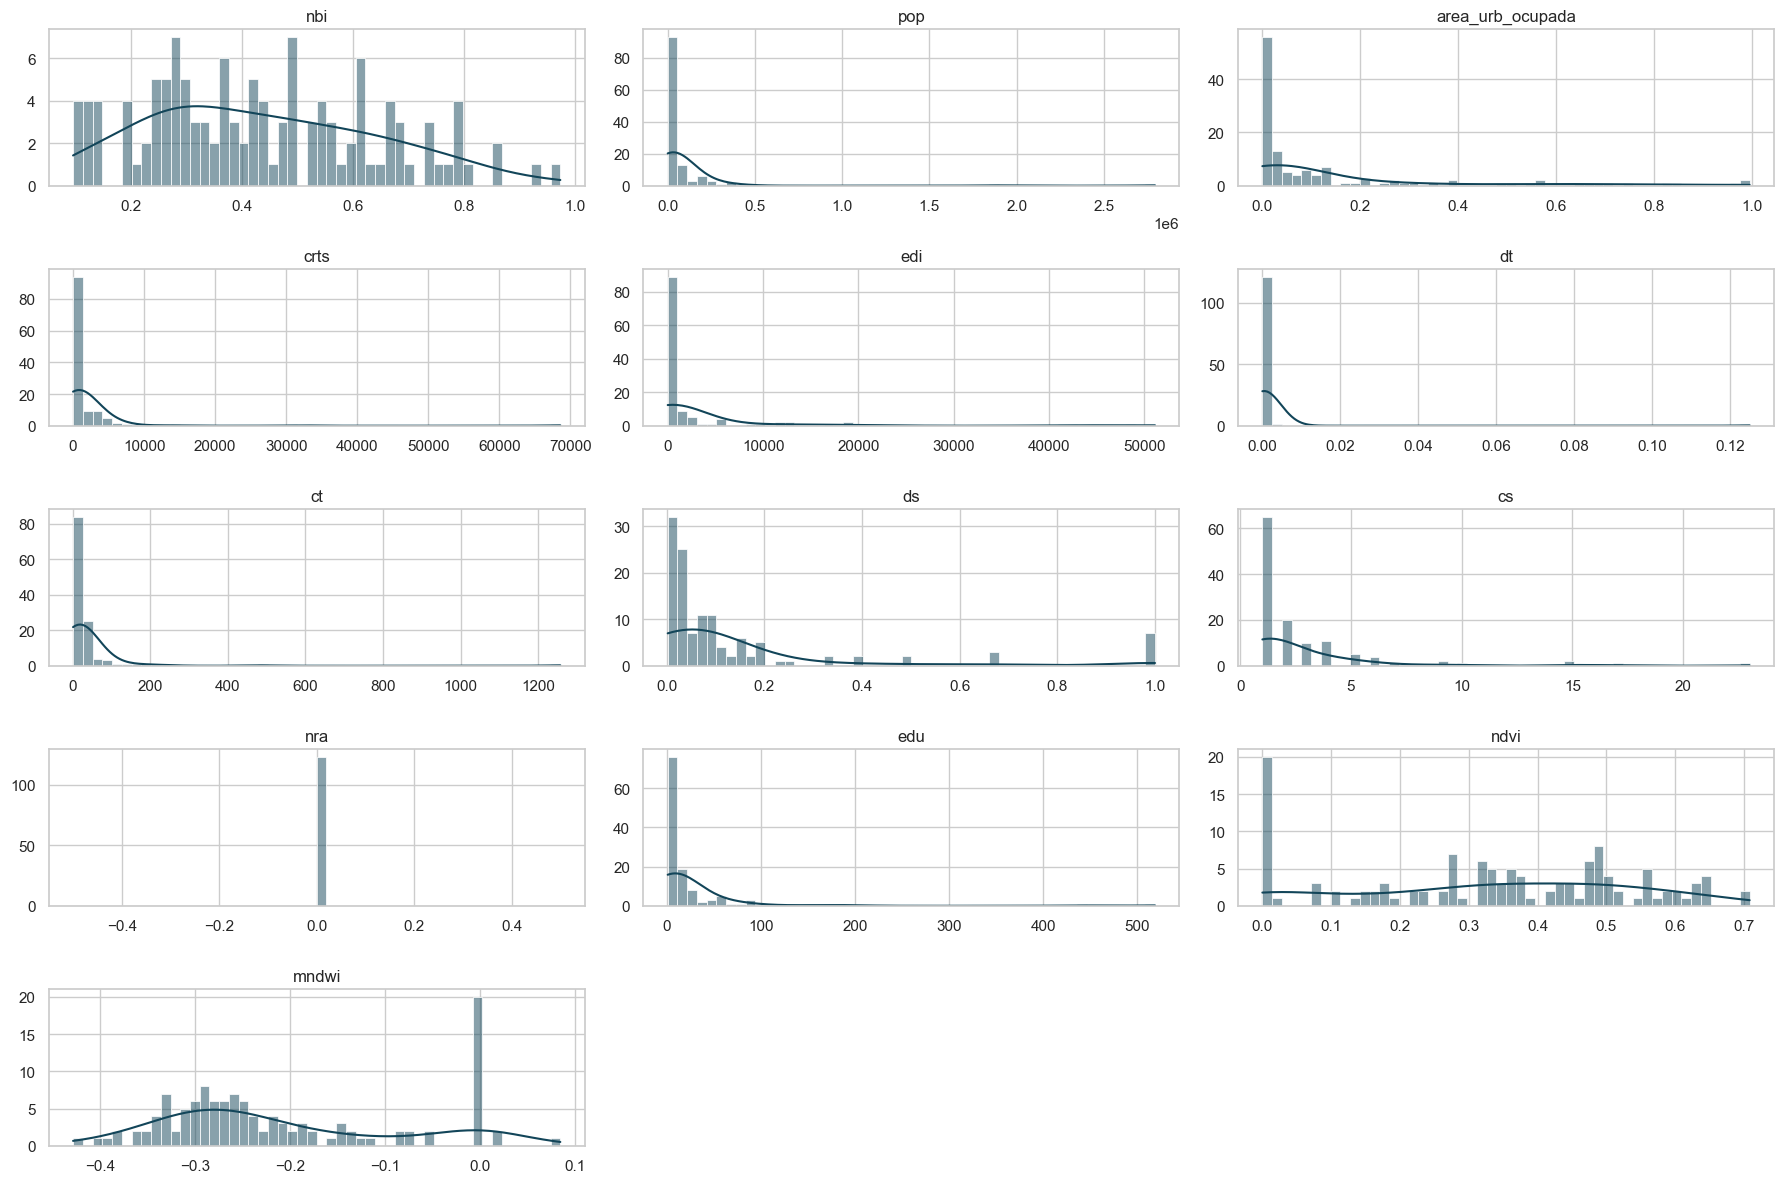

In [11]:
# Mostrar distribuciones

# Forma base de visualización
#consolidada[variables_a_revisar].hist(bins=50, figsize=(20, 15))
#plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar estilo
sns.set(style="whitegrid")

# Crear figura
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 12))  # Ajusta según cuántas variables tengas
axes = axes.flatten()

# Iterar sobre las variables y dibujar histogramas bonitos
for i, var in enumerate(variables_a_revisar):
    sns.histplot(data=consolidada, x=var, bins=50, kde=True, color="#124559", ax=axes[i])
    axes[i].set_title(f'{var}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ocultar ejes vacíos si hay menos variables que subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
fig.savefig("distribuciones_variables.png", dpi=300)
plt.show()

Las distribuciones en algunso casos están muy concentradas, por lo que linealizaremos con logarimos para estudiar mejor las relaciones.

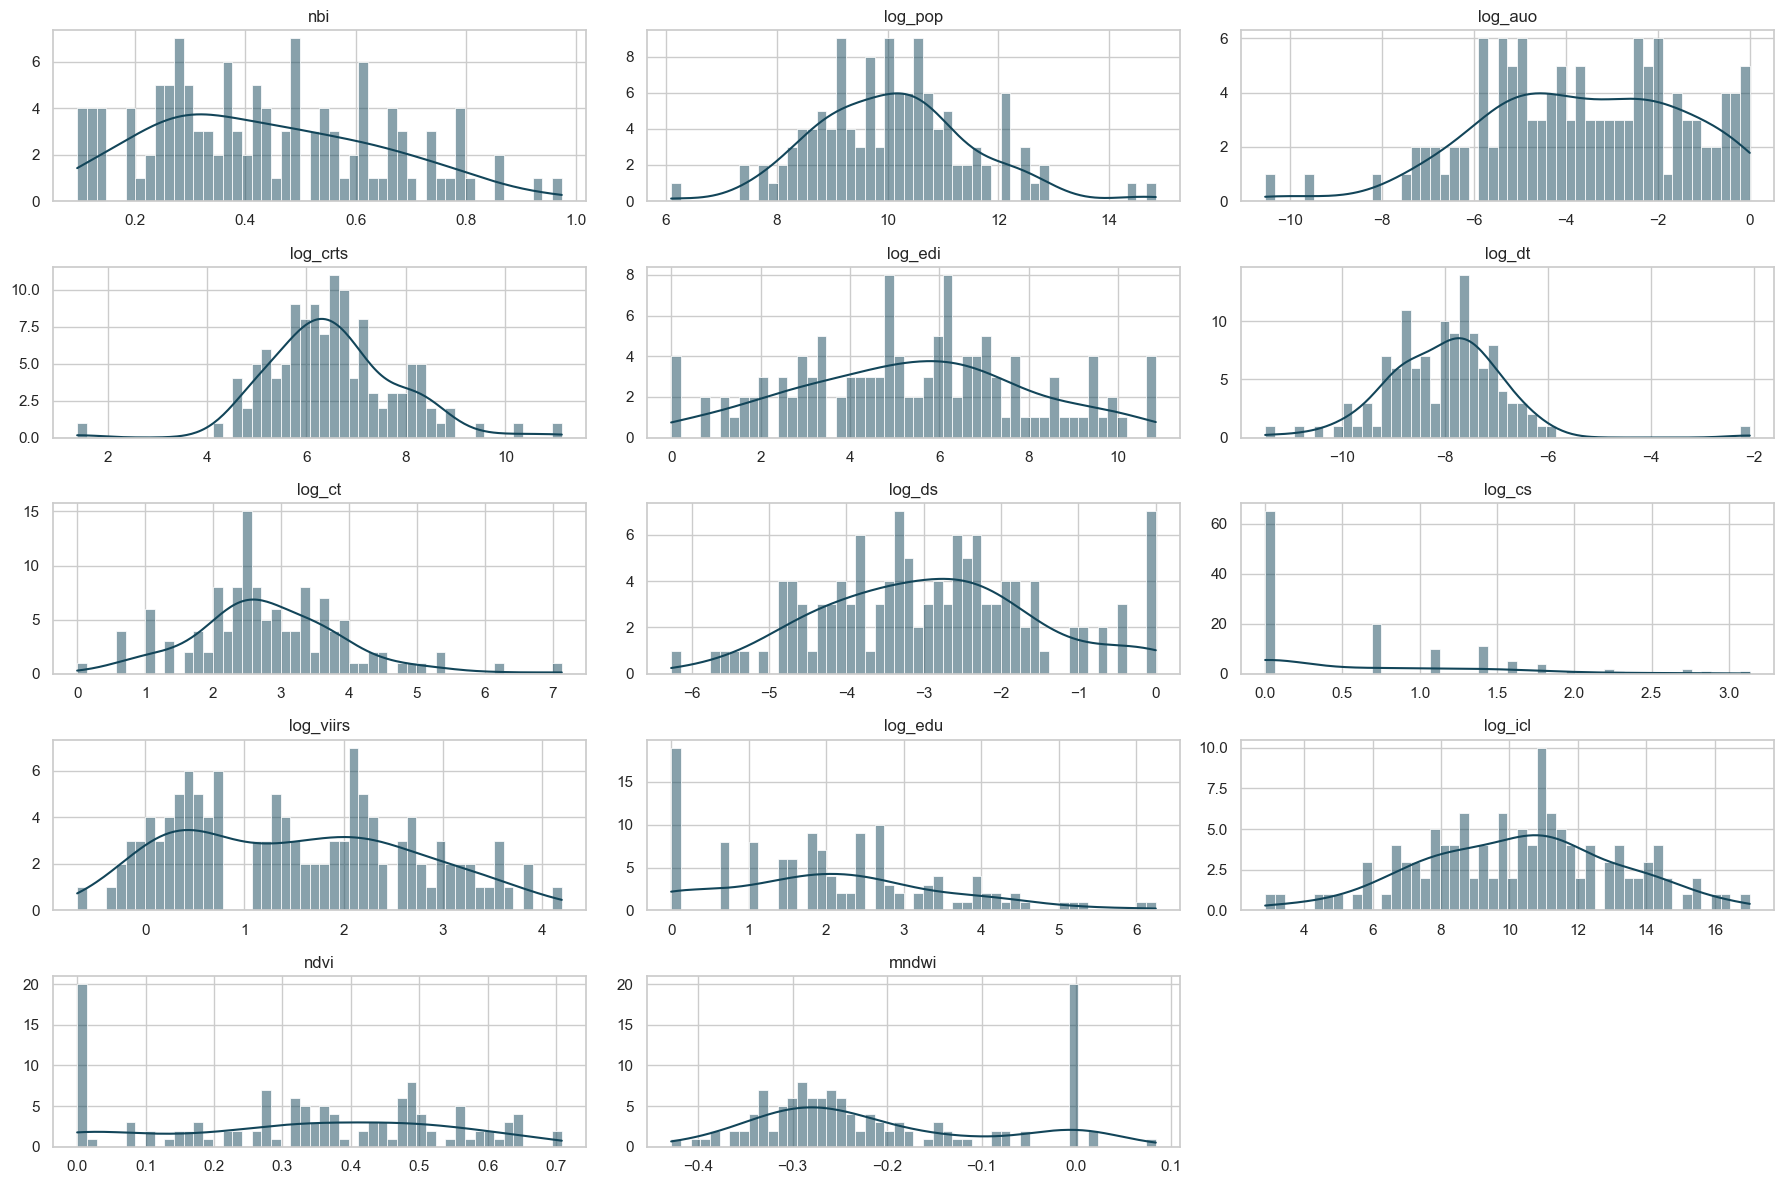

In [12]:
# Histogramas
consolidada = consolidada.copy()
consolidada['log_pop'] = np.log(consolidada['pop'])
consolidada['log_auo'] = np.log(consolidada['area_urb_ocupada'])
consolidada['log_crts'] = np.log(consolidada['crts'])
consolidada['log_edi'] = np.log(consolidada['edi'])
consolidada['log_dt'] = np.log(consolidada['dt'])
consolidada['log_ct'] = np.log(consolidada['ct'])
consolidada['log_ds'] = np.log(consolidada['ds'])
consolidada['log_cs'] = np.log(consolidada['cs'])
consolidada['log_edu'] = np.log(consolidada['edu'])
consolidada['log_viirs'] = np.log(consolidada['viirs'])
consolidada['log_icl'] = np.log(consolidada['icl'])

# Ver relaciones
varias = ['nbi', 'log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_dt', 'log_ct', 'log_ds', 'log_cs', 'log_viirs', 'log_edu', 'log_icl', 
          'ndvi', 'mndwi']
#consolidada[varias].hist(bins=50, figsize=(20, 15))
#plt.show()

# Ajustar estilo
sns.set(style="whitegrid")

# Crear figura
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 12))  # Ajusta según cuántas variables tengas
axes = axes.flatten()

# Iterar sobre las variables y dibujar histogramas bonitos
for i, var in enumerate(varias):
    sns.histplot(data=consolidada, x=var, bins=50, kde=True, color="#124559", ax=axes[i])
    axes[i].set_title(f'{var}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ocultar ejes vacíos si hay menos variables que subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
fig.savefig("distribuciones_variables_ajustadas.png", dpi=300)
plt.show()

# Correlaciones

In [13]:
# Gráfico por defecto
#scatter_matrix(consolidada[varias], figsize=(20, 15))
#fig.savefig("dt2.png", dpi=300)
#plt.show()

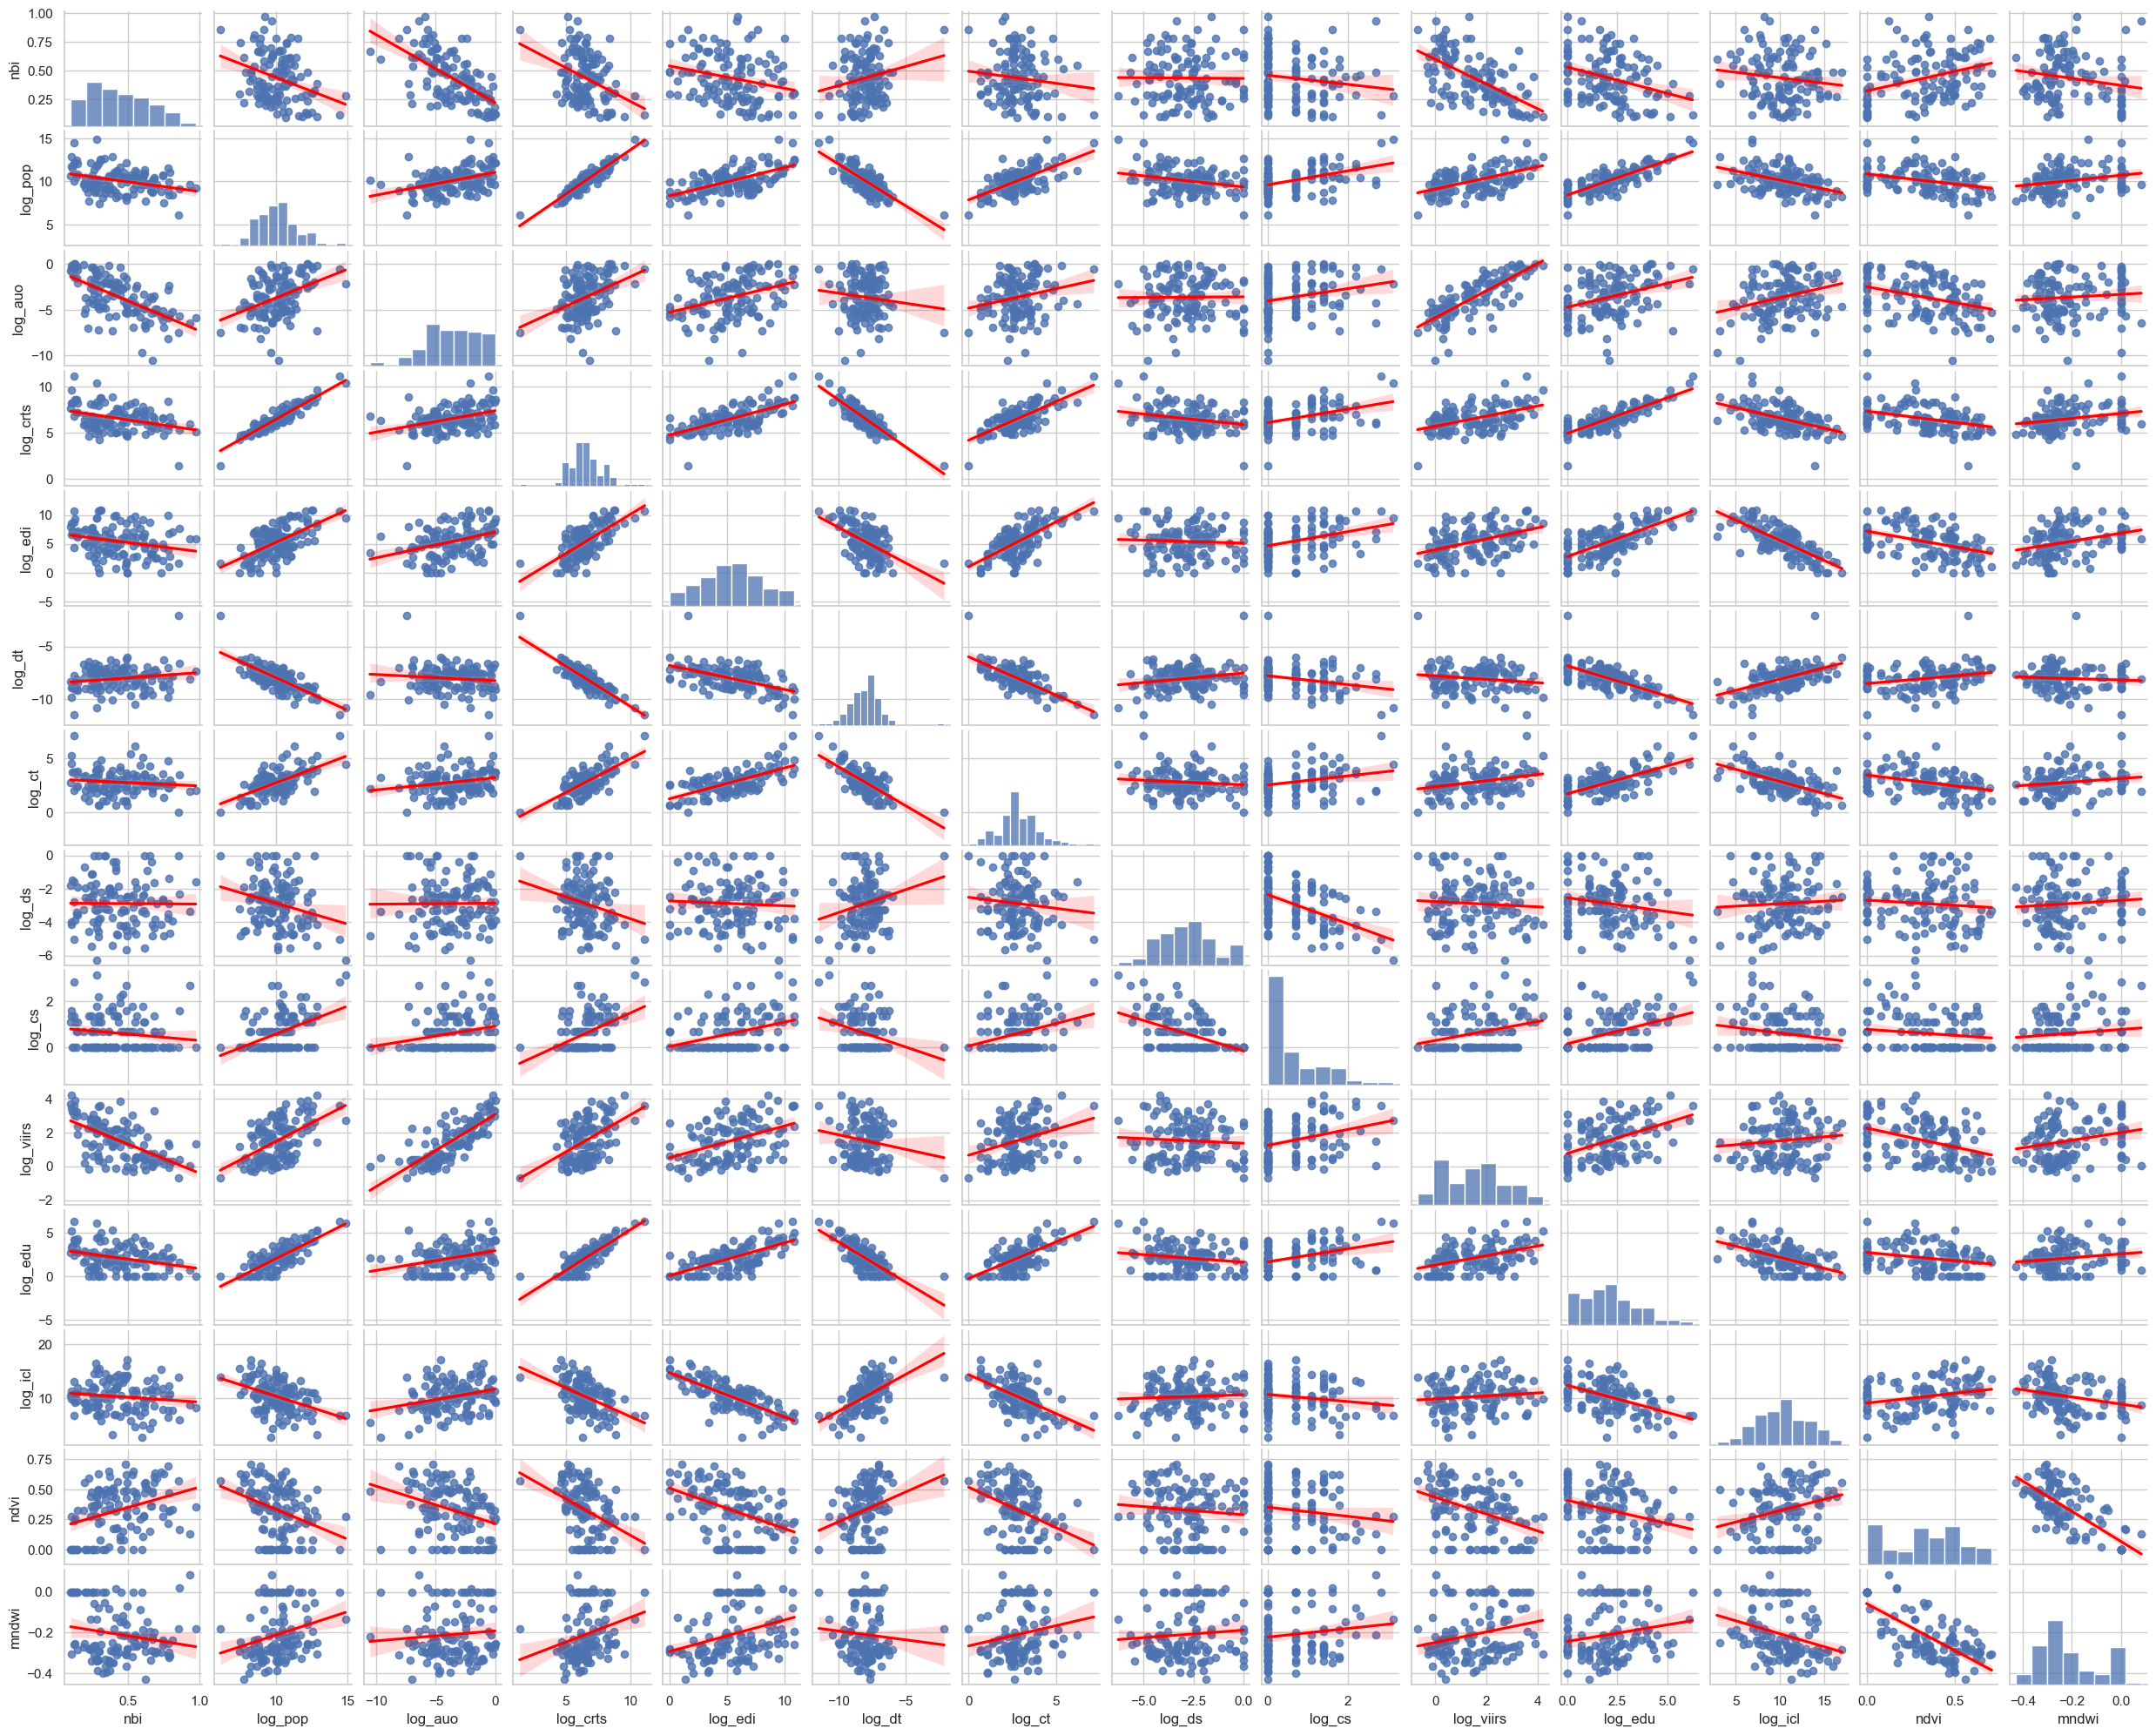

In [14]:
# Gráfico mejorado

# pairplot con línea de tendencia (regresión lineal)
sns.pairplot(consolidada[varias], kind='reg', plot_kws={'line_kws':{'color':'red'}})

plt.gcf().set_size_inches(25, 20)
plt.savefig("grafCorre.png", dpi=300)
plt.show()

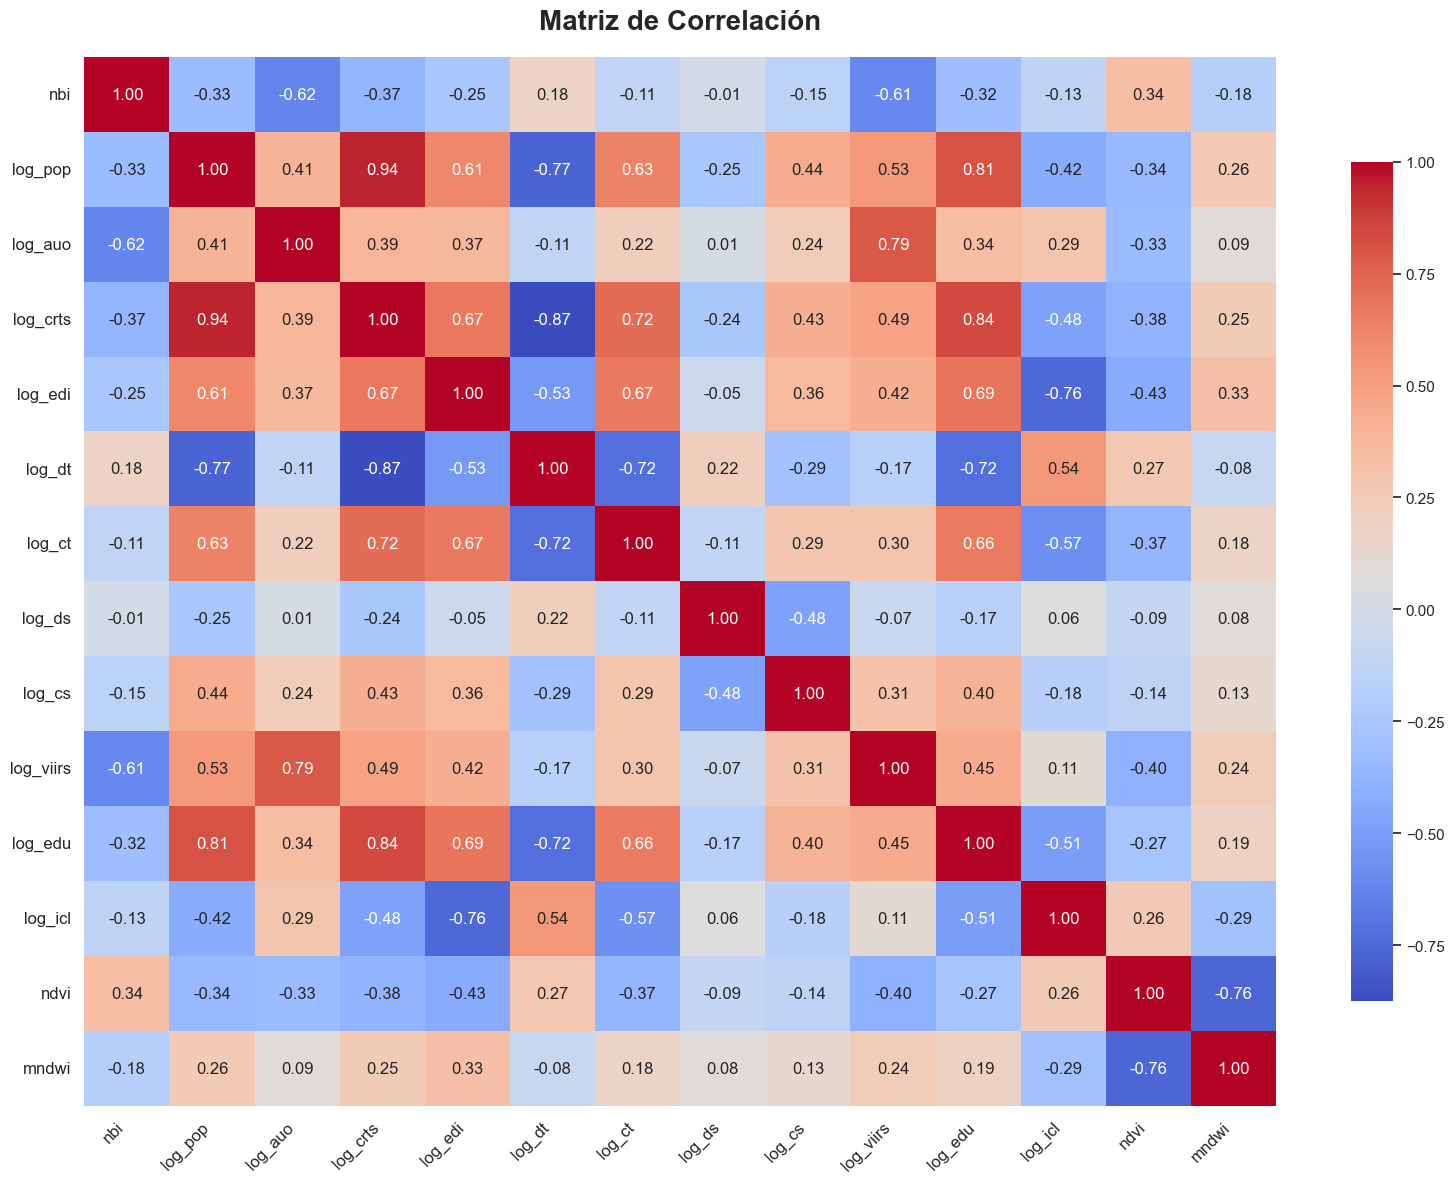

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
corr = consolidada[varias].corr(numeric_only=True)

# Establecer tamaño de figura más grande
plt.figure(figsize=(16, 12))  # Cambia el tamaño aquí

# Crear heatmap con más estilo
sns.heatmap(
    corr,
    annot=True,              # Muestra los valores
    fmt=".2f",               # Formato de los números
    cmap="coolwarm",         # Paleta de colores
    annot_kws={"size": 12},  # Tamaño del texto dentro de los cuadros
    cbar_kws={"shrink": 0.8} # Barra de color más pequeña
)

# Títulos y etiquetas más grandes
plt.title("Matriz de Correlación", fontsize=20, fontweight="bold", pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.show()


# Modelo

## Selección de variables

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Método hacia adelante
def forward_selection_sklearn(X, y, modelo=None, max_features=None, verbose=True):
    """
    Selección hacia adelante con sklearn usando MSE como criterio.

    Parámetros:
        X            : DataFrame con variables predictoras
        y            : Serie o array de variable objetivo
        modelo       : Modelo sklearn (por defecto LinearRegression)
        max_features : Número máximo de variables a seleccionar
        verbose      : Mostrar progreso o no

    Retorna:
        Lista de nombres de variables seleccionadas
    """
    if modelo is None:
        modelo = LinearRegression()

    remaining_features = list(X.columns)
    selected_features = []
    current_score = np.inf
    n_features = max_features if max_features else X.shape[1]

    for _ in range(n_features):
        scores = []
        for candidate in remaining_features:
            features_to_test = selected_features + [candidate]
            modelo.fit(X[features_to_test], y)
            y_pred = modelo.predict(X[features_to_test])
            mse = mean_squared_error(y, y_pred)
            scores.append((mse, candidate))

        scores.sort()
        best_new_score, best_candidate = scores[0]

        if best_new_score < current_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
            if verbose:
                print(f"Agregado: {best_candidate}, MSE: {current_score:.4f}")
        else:
            break

    return selected_features


# Hacia atrás
def backward_elimination_sklearn(X, y, modelo=None, min_features=1, verbose=True):
    """
    Eliminación hacia atrás con sklearn usando MSE como criterio.

    Parámetros:
        X            : DataFrame con variables predictoras
        y            : Serie o array con variable objetivo
        modelo       : Modelo sklearn (por defecto LinearRegression)
        min_features : Número mínimo de variables a conservar
        verbose      : Mostrar progreso

    Retorna:
        Lista de variables seleccionadas
    """
    if modelo is None:
        modelo = LinearRegression()

    selected_features = list(X.columns)
    current_score = np.inf

    while len(selected_features) > min_features:
        scores = []
        for candidate in selected_features:
            features_to_test = [f for f in selected_features if f != candidate]
            modelo.fit(X[features_to_test], y)
            y_pred = modelo.predict(X[features_to_test])
            mse = mean_squared_error(y, y_pred)
            scores.append((mse, candidate))

        # Encontrar variable cuya eliminación mejora más (o empeora menos)
        scores.sort()
        best_new_score, worst_candidate = scores[0]

        if best_new_score < current_score:
            selected_features.remove(worst_candidate)
            current_score = best_new_score
            if verbose:
                print(f"Eliminado: {worst_candidate}, MSE: {current_score:.4f}")
        else:
            break

    return selected_features

Datos de partida

In [17]:
df = consolidada[varias]
print(df.shape)

# Suponiendo que tienes un DataFrame df
X = df.drop("nbi", axis=1)
y = df["nbi"]

(123, 14)


Rendimiento seleccionando hacia adelante

In [18]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

# Por método hacia adelante 
m1 = forward_selection_sklearn(X, y, modelo=modelo)
print("Variables seleccionadas:", m1)

# Por método hacia atrás
m2 = backward_elimination_sklearn(X, y, modelo)
print("Variables seleccionadas:", m2)

Agregado: log_auo, MSE: 0.0264
Agregado: log_viirs, MSE: 0.0249
Agregado: ndvi, MSE: 0.0244
Agregado: log_ct, MSE: 0.0240
Agregado: log_dt, MSE: 0.0226
Agregado: log_pop, MSE: 0.0222
Agregado: log_crts, MSE: 0.0213
Agregado: log_edi, MSE: 0.0212
Agregado: log_icl, MSE: 0.0198
Agregado: log_edu, MSE: 0.0197
Agregado: mndwi, MSE: 0.0196
Agregado: log_ds, MSE: 0.0196
Agregado: log_cs, MSE: 0.0196
Variables seleccionadas: ['log_auo', 'log_viirs', 'ndvi', 'log_ct', 'log_dt', 'log_pop', 'log_crts', 'log_edi', 'log_icl', 'log_edu', 'mndwi', 'log_ds', 'log_cs']
Eliminado: ndvi, MSE: 0.0196
Variables seleccionadas: ['log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_dt', 'log_ct', 'log_ds', 'log_cs', 'log_viirs', 'log_edu', 'log_icl', 'mndwi']


In [19]:
# Método por regularización: Lasso y ElasticNet
from sklearn.linear_model import LassoCV

modelo = LassoCV(cv=5).fit(X, y)
coef = pd.Series(modelo.coef_, index=X.columns)
m3 = coef[coef != 0].index.tolist()
m3

['log_auo', 'log_viirs']

In [20]:
# la 
from sklearn.linear_model import ElasticNetCV

# Ajustar ElasticNet con validación cruzada
modelo_en = ElasticNetCV(cv=5, l1_ratio=[.1, .5, .7, .9, .95, .99, 1]).fit(X, y)

# Extraer coeficientes distintos de cero
coef_en = pd.Series(modelo_en.coef_, index=X.columns)
m3_1 = coef_en[coef_en != 0].index.tolist()
m3_1

['log_auo', 'log_viirs']

In [21]:
# 2. Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X, y)
m4 = X.columns[rfe.support_]
m4

Index(['log_pop', 'log_auo', 'log_crts', 'log_viirs', 'mndwi'], dtype='object')

<Axes: >

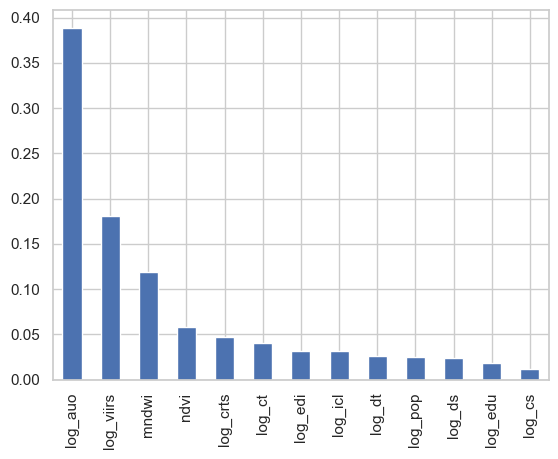

In [22]:
# Modelos basados en importancia (Tree-based)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X, y)
importancia = pd.Series(rf.feature_importances_, index=X.columns)
importancia.sort_values(ascending=False).plot(kind='bar')

In [23]:
m5 = importancia.to_frame().reset_index()['index'].tolist()
m5

['log_pop',
 'log_auo',
 'log_crts',
 'log_edi',
 'log_dt',
 'log_ct',
 'log_ds',
 'log_cs',
 'log_viirs',
 'log_edu',
 'log_icl',
 'ndvi',
 'mndwi']

In [24]:
# Filtros estadísticos
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# X: DataFrame con variables predictoras
# y: Serie con variable objetivo

# Crear selector que elige las k mejores variables (por ejemplo, 5)
selector = SelectKBest(score_func=f_regression, k=7)

# Ajustar selector a los datos
selector.fit(X, y)

# Obtener booleanos de variables seleccionadas
mask = selector.get_support()

# Filtrar columnas seleccionadas (nombres)
m6 = X.columns[mask]

print("Variables seleccionadas:", list(m6))

Variables seleccionadas: ['log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_viirs', 'log_edu', 'ndvi']


In [25]:
# Por método Boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

# Supón que X es un array o dataframe y y la variable objetivo
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)

boruta_selector = BorutaPy(
    rf,
    n_estimators='auto',
    verbose=2,
    random_state=42
)

boruta_selector.fit(X.values, y.values)

# Variables seleccionadas
m7 = X.columns[boruta_selector.support_].to_list()
print("Variables seleccionadas por Boruta:", m7)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	9
Iteration:

# Análisis econométrico

In [26]:
import statsmodels.api as sm 
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [27]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

# agrego constanets
X1 = sm.add_constant(X[m1])
X2 = sm.add_constant(X[m2])
X3 = sm.add_constant(X[m2])
X4 = sm.add_constant(X[m4])
X5 = sm.add_constant(X[m5])
X6 = sm.add_constant(X[m6])
X7 = sm.add_constant(X[m7])

# especifico modelos
model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()
model4 = sm.OLS(y, X4).fit()
model5 = sm.OLS(y, X5).fit()
model6 = sm.OLS(y, X6).fit()
model7 = sm.OLS(y, X7).fit()

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera

# calcular VIF
def calcular_max_vif(X):
    if 'const' in X.columns:
        X_vif = X.drop(columns='const')
    else:
        X_vif = X.copy()
    vif_vals = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    return max(vif_vals)

# resumir métricas modelos
def resumen_modelo(model, X, y):
    bp_test = het_breuschpagan(model.resid, X)
    max_vif = calcular_max_vif(X)
    jb_pval = jarque_bera(model.resid)[2]


    return {
        'DW': round(durbin_watson(model.resid), 2),
        'Breusch-Pagan p-val': round(bp_test[1], 3),
        'JB p-val': round(jb_pval, 3),
        'Max VIF': round(max_vif, 2),
        'F-stat': round(model.fvalue, 2),
        'F p-val': round(model.f_pvalue, 3)
    }

In [28]:
# Lista de modelos y sus X correspondientes
modelos = [model1, model2, model3, model4, model5, model6, model7]
Xs = [X1, X2, X3, X4, X5, X6, X7]
nombres = [f'Modelo {i}' for i in range(1, 8)]

# Crear tabla resumen
resumenes = [resumen_modelo(m, X, y) for m, X in zip(modelos, Xs)]
df_resumen = pd.DataFrame(resumenes, index=nombres)

print(df_resumen)

            DW  Breusch-Pagan p-val  JB p-val  Max VIF  F-stat  F p-val
Modelo 1  1.51                0.174     0.084   661.43    9.97      0.0
Modelo 2  1.52                0.143     0.082   653.74   10.90      0.0
Modelo 3  1.52                0.143     0.082   653.74   10.90      0.0
Modelo 4  1.28                0.042     0.250   255.94   19.76      0.0
Modelo 5  1.51                0.174     0.084   661.43    9.97      0.0
Modelo 6  1.34                0.098     0.130   317.89   14.94      0.0
Modelo 7  1.21                0.026     0.168     3.02   29.51      0.0


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X[m1])

# aplicar PCA para conservar componentes que explican 95% de la varianza
pca = PCA(n_components=0.95)  # Conserva componentes con el 95% de la varianza
pca.fit_transform(X1_scaled)

print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Número de componentes retenidas:", pca.n_components_)

Varianza explicada por componente: [0.46110786 0.14955201 0.12933546 0.08660034 0.05232157 0.03400926
 0.03113044 0.01876288]
Número de componentes retenidas: 8


In [30]:
# Obtener los loadings absolutos (contribución de cada variable a cada componente)
loadings1 = pd.DataFrame(
    np.abs(pca.components_.T),  # transpuesta para que filas = variables
    index=X[m1].columns,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Seleccionar las variables más influyentes por componente
selected_vars1 = []
for i in range(pca.n_components_):
    pc_loadings1 = loadings1.iloc[:, i].sort_values(ascending=False)
    for var in loadings1.index:
        if var not in selected_vars1:
            selected_vars1.append(var)
            break  # solo tomamos una por componente (sin repetir)

print("Variables seleccionadas:", selected_vars1)

Variables seleccionadas: ['log_auo', 'log_viirs', 'ndvi', 'log_ct', 'log_dt', 'log_pop', 'log_crts', 'log_edi']


In [31]:
# Seleccionar las variables finales desde el DataFrame original
X1_reducido = X[selected_vars1]

# Agregar constante para intercepto
X1_reducido = sm.add_constant(X1_reducido)

# Ajustar el modelo
modelo1_pca = sm.OLS(y, X1_reducido).fit()

In [32]:
resumen_modelo(modelo1_pca, X1_reducido, y)

{'DW': np.float64(1.38),
 'Breusch-Pagan p-val': np.float64(0.087),
 'JB p-val': np.float64(0.275),
 'Max VIF': np.float64(372.26),
 'F-stat': np.float64(14.57),
 'F p-val': np.float64(0.0)}

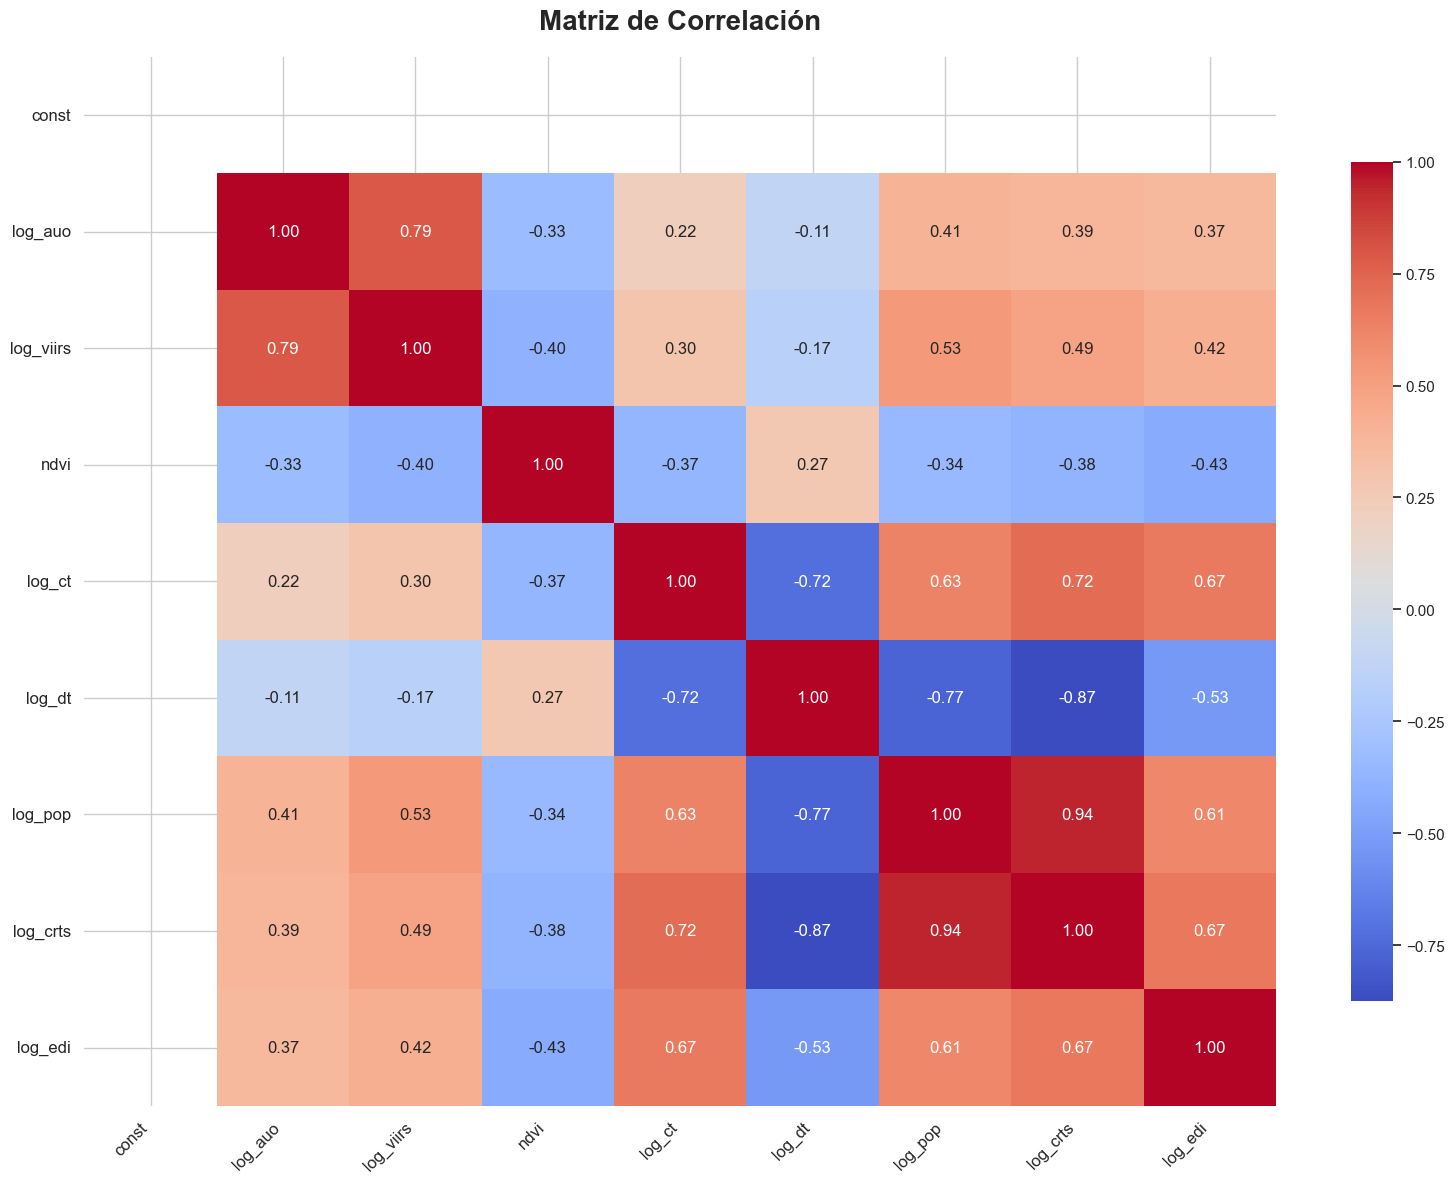

In [33]:
# Calcular matriz de correlación
corr_pca1 = X1_reducido.corr(numeric_only=True)

# Establecer tamaño de figura más grande
plt.figure(figsize=(16, 12))  # Cambia el tamaño aquí

# Crear heatmap con más estilo
sns.heatmap(
    corr_pca1,
    annot=True,              # Muestra los valores
    fmt=".2f",               # Formato de los números
    cmap="coolwarm",         # Paleta de colores
    annot_kws={"size": 12},  # Tamaño del texto dentro de los cuadros
    cbar_kws={"shrink": 0.8} # Barra de color más pequeña
)

# Títulos y etiquetas más grandes
plt.title("Matriz de Correlación", fontsize=20, fontweight="bold", pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.show()

In [34]:
def variables_elegidas_pca(variables):
    scaler = StandardScaler()
    variables_scaled = scaler.fit_transform(variables)
    
    pca = PCA(n_components=0.95)
    pca.fit_transform(variables_scaled)
    
    # Obtener los loadings absolutos (contribución de cada variable a cada componente)
    loadings = pd.DataFrame(
        np.abs(pca.components_.T),  # transpuesta para que filas = variables
        index=variables.columns,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)]
    )

    # Seleccionar las variables más influyentes por componente
    variables_seleccionadas = []
    for i in range(pca.n_components_):
        pc_loadings = loadings.iloc[:, i].sort_values(ascending=False)
        for var in loadings.index:
            if var not in variables_seleccionadas:
                variables_seleccionadas.append(var)
                break  # solo tomamos una por componente (sin repetir)

    return variables_seleccionadas

In [35]:
variables_m1 = variables_elegidas_pca(X[m1])
variables_m2 = variables_elegidas_pca(X[m2])
variables_m3 = variables_elegidas_pca(X[m3])

In [36]:
# agrego constanets
X1_conpca = sm.add_constant(X[variables_m1])
X2_conpca = sm.add_constant(X[variables_m2])
X3_conpca = sm.add_constant(X[variables_m3])

# especifico modelos
model1_pca = sm.OLS(y, X1_conpca).fit()
model2_pca = sm.OLS(y, X2_conpca).fit()
model3_pca = sm.OLS(y, X3_conpca).fit()

In [37]:
# Lista de modelos y sus X correspondientes
modelos = [model1_pca, model2_pca, model3_pca]
Xs = [X1_conpca, X2_conpca, X3_conpca]
nombres = [f'Modelo {i}' for i in range(1, 4)]

# Crear tabla resumen
resumenes = [resumen_modelo(m, X, y) for m, X in zip(modelos, Xs)]
df_resumen = pd.DataFrame(resumenes, index=nombres)

print(df_resumen)

            DW  Breusch-Pagan p-val  JB p-val  Max VIF  F-stat  F p-val
Modelo 1  1.38                0.087     0.275   372.26   14.57      0.0
Modelo 2  1.32                0.028     0.116   354.13   14.23      0.0
Modelo 3  1.19                0.024     0.132     1.23   43.44      0.0


Correción del modelo 3

In [38]:
X3_conpca = sm.add_constant(X[variables_m3])

# especifico modelos
modelo_def = sm.OLS(y, X3_conpca).fit(cov_type='HC1')
resumen_modelo(modelo_def, X3_conpca, y)

{'DW': np.float64(1.19),
 'Breusch-Pagan p-val': np.float64(0.024),
 'JB p-val': np.float64(0.132),
 'Max VIF': np.float64(1.23),
 'F-stat': 50.45,
 'F p-val': 0.0}

In [39]:
modelo_def.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nbi   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     50.45
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           1.26e-16
Time:                        14:08:57   Log-Likelihood:                 52.663
No. Observations:                 123   AIC:                            -99.33
Df Residuals:                     120   BIC:                            -90.89
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3898      0.079      4.927      0.000       0.235       0.545
log_auo       -0.0358      0.012     -2.869      0.004      -0.060      -0.011
log_viirs     -0.0544      0.024     -2.266      0.023      -0.102      -0.007
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.370
Skew:                           0.132   Prob(JB):                        0.831
Kurtosis:                       3.051   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [40]:
print(modelo_def.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &       nbi        & \textbf{  R-squared:         } &     0.420   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.410   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     50.45   \\
\textbf{Date:}             & Tue, 15 Jul 2025 & \textbf{  Prob (F-statistic):} &  1.26e-16   \\
\textbf{Time:}             &     14:08:57     & \textbf{  Log-Likelihood:    } &    52.663   \\
\textbf{No. Observations:} &         123      & \textbf{  AIC:               } &    -99.33   \\
\textbf{Df Residuals:}     &         120      & \textbf{  BIC:               } &    -90.89   \\
\textbf{Df Model:}         &           2      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &       HC1        & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                    & \textbf{coef} & \

Verificar autocorrelación espacial

In [60]:
df

,nbi,log_pop,log_auo,log_crts,log_edi,log_dt,log_ct,log_ds,log_cs,log_viirs,...,log_icl,ndvi,mndwi,intervalo_virss,intervalo_icl,intervalo_auo,intervalo_edi,intervalo_ctrs,intervalo_ct,intervalo_nbi
0,0.099034,12.844140,-0.178738,9.566265,8.579041,-9.835495,5.283204,-4.166665,1.386294,4.201782,...,9.895193,0.276570,-0.303005,Muy alto,Medio,Muy alto,Muy alto,Muy alto,Muy alto,Muy bajo
1,0.284258,10.035042,-4.663820,6.364751,5.843544,-8.542114,3.970292,-4.060443,0.000000,0.754438,...,8.765098,0.494996,-0.386760,Bajo,Bajo,Bajo,Medio,Medio,Muy alto,Bajo
4,0.322550,8.116417,-4.717017,4.990433,2.079442,-7.594204,1.098612,-2.676798,0.693147,0.224944,...,13.046070,0.465710,-0.400764,Muy bajo,Muy alto,Bajo,Muy bajo,Muy bajo,Muy bajo,Bajo
6,0.271838,8.964184,-0.969947,5.509388,1.791759,-7.542220,3.931826,-1.704748,0.000000,2.297343,...,16.368746,0.443227,-0.335442,Alto,Muy alto,Muy alto,Muy bajo,Muy bajo,Muy alto,Bajo
15,0.290214,9.290445,-7.180283,5.897154,3.828641,-8.646325,3.091042,0.000000,0.000000,0.341254,...,8.701588,0.376567,-0.335160,Muy bajo,Bajo,Muy bajo,Bajo,Bajo,Alto,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0.555402,10.566330,-5.182359,7.079184,6.188264,-8.651932,2.564949,-4.695925,0.000000,0.429423,...,7.569707,0.468094,-0.253856,Bajo,Muy bajo,Bajo,Medio,Alto,Medio,Alto
1034,0.393920,9.023529,-3.500293,5.802118,2.944439,-7.853190,1.386294,-2.140066,0.000000,1.393815,...,13.137346,0.175520,-0.346480,Medio,Muy alto,Medio,Muy bajo,Bajo,Muy bajo,Medio
1035,0.445716,11.674015,-0.344397,6.997596,4.882802,-7.719448,3.912023,-4.185729,2.197225,3.853664,...,13.208278,0.079653,-0.209470,Muy alto,Muy alto,Muy alto,Bajo,Alto,Muy alto,Medio
1036,0.362389,10.507749,-0.202080,6.675823,4.882802,-6.960470,1.791759,-2.197225,1.609438,3.330274,...,13.604029,0.018730,-0.081029,Muy alto,Muy alto,Muy alto,Bajo,Alto,Muy bajo,Medio


In [78]:
# Cargar shapefile local
shapefile_path = "C:/Users/Michael/Documents/ml_zc/ecu_adm_2024/ecu_adm_adm3_2024.shp"
gdf = gpd.read_file(shapefile_path)

gdf = gdf[['ADM3_PCODE', 'geometry']]
gdf['ADM3_PCODE'] = gdf['ADM3_PCODE'].str.replace('EC', '', regex=False)
geodf = consolidada[['ADM3_PCODE']].merge(gdf, how='left', on='ADM3_PCODE')

In [82]:
# Residuos
residuals = modelo_def.resid

from esda.moran import Moran
from libpysal.weights import Queen

w = Queen.from_dataframe(geodf)  # geodf: GeoDataFrame con las parroquias
moran_resid = Moran(residuals, w)

print("Moran's I:", moran_resid.I)
print("p-value:", moran_resid.p_sim)

C:\Users\Michael\AppData\Local\Temp\ipykernel_17644\1116939828.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(geodf)  # geodf: GeoDataFrame con las parroquias


('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 98, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
Moran's I: 0.406191791700444
p-value: 0.001


C:\Users\Michael\AppData\Local\Programs\Python\Python310\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 30 disconnected components.
 There are 16 islands with ids: 10, 22, 23, 26, 28, 30, 40, 45, 62, 66, 98, 103, 108, 109, 110, 111.
  W.__init__(self, neighbors, ids=ids, **kw)


In [90]:
#Vamos a ajustar por una matriz de pesos por distancia (contiguidad)
from libpysal.weights import KNN
from spreg import GM_Error

w = KNN.from_dataframe(geodf, k=5)
w.transform = 'r'

sem_model = GM_Error(y, df[['log_auo', 'log_viirs']], w=w)
print(sem_model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES
------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :         nbi                Number of Observations:         123
Mean dependent var  :      0.4366                Number of Variables   :           3
S.D. dependent var  :      0.2079                Degrees of Freedom    :         120
Pseudo R-squared    :      0.4178

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         0.43863         0.06358         6.89868         0.00000
             log_auo        -0.02689         0.00962        -2.79541         0.00518
           log_viirs        -0.06264         0.01761        -3.55746

In [41]:
# consolidada.to_excel('C:/Users/Michael/Documents/ml_zc/datosObtenidos/results_más.xlsx', index_label=False)

# Clustering

In [42]:
import gower

In [43]:
df2 = df.dropna() #.drop(columns=['nbi'])

In [44]:
# Creamos una matriz cruzada con las distancias
distance_matrix = gower.gower_matrix(df2)
pd.DataFrame(distance_matrix) 

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.000000,0.290834,0.404148,0.316174,0.340718,0.367516,0.287841,0.323724,0.441071,0.300930,...,0.211109,0.283185,0.232812,0.281078,0.371501,0.312310,0.338293,0.223374,0.271501,0.316490
1,0.290834,0.000000,0.162202,0.158693,0.089726,0.179261,0.145374,0.104513,0.161637,0.103803,...,0.230554,0.152334,0.168912,0.141460,0.193704,0.093000,0.148602,0.259682,0.273739,0.219979
2,0.404148,0.162202,0.000000,0.157654,0.140472,0.147074,0.164596,0.154733,0.116639,0.158652,...,0.352660,0.180462,0.206115,0.191832,0.123028,0.205203,0.130335,0.305142,0.278377,0.239012
3,0.316174,0.158693,0.157654,0.000000,0.157993,0.088385,0.076043,0.101456,0.177813,0.145666,...,0.354874,0.195969,0.209143,0.252455,0.189564,0.231203,0.132862,0.224169,0.235065,0.138667
4,0.340718,0.089726,0.140472,0.157993,0.000000,0.198992,0.142912,0.138318,0.126252,0.133107,...,0.267003,0.192430,0.179850,0.145637,0.148082,0.125603,0.139094,0.292833,0.293979,0.206967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.312310,0.093000,0.205203,0.231203,0.125603,0.193317,0.163085,0.171071,0.167394,0.105459,...,0.206524,0.109343,0.163295,0.088653,0.171317,0.000000,0.179003,0.264884,0.268137,0.207633
119,0.338293,0.148602,0.130335,0.132862,0.139094,0.120698,0.094187,0.101118,0.167347,0.096656,...,0.331107,0.146294,0.113282,0.166885,0.151361,0.179003,0.000000,0.211942,0.188680,0.131972
120,0.223374,0.259682,0.305142,0.224169,0.292833,0.262697,0.207020,0.225442,0.340240,0.206129,...,0.296739,0.204761,0.139383,0.203684,0.248328,0.264884,0.211942,0.000000,0.096953,0.130063
121,0.271501,0.273739,0.278377,0.235065,0.293979,0.241413,0.185724,0.228985,0.344394,0.203530,...,0.343286,0.184546,0.154440,0.209614,0.249975,0.268137,0.188680,0.096953,0.000000,0.119504


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Instancia de escalador estándar
scaler = StandardScaler()

# Ajustar y transformar datos
df_scaled = scaler.fit_transform(distance_matrix)

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


def cluster(model, X_scaled, method):
    # Seed
    np.random.seed(35735)

    # Estimación
    model.fit(X_scaled)

    # Numero de clusters
    clusters = model.labels_
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # No contar ruido (-1)

    # Resultados
    print(f'\nModel Report\n{method}\n')
    print(f'Number of clusters: {num_clusters}\n')

    if num_clusters >= 2:
        silh_score = silhouette_score(X_scaled, clusters)
        print(f'Silhouette Coefficient: {silh_score:.3f}')
    else:
        print('Silhouette Coefficient: No se puede calcular (solo 1 cluster o solo ruido).')
    
    return clusters

In [47]:
# Simulamos un dataset de ejemplo si no tienes tus datos cargados
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Escalamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

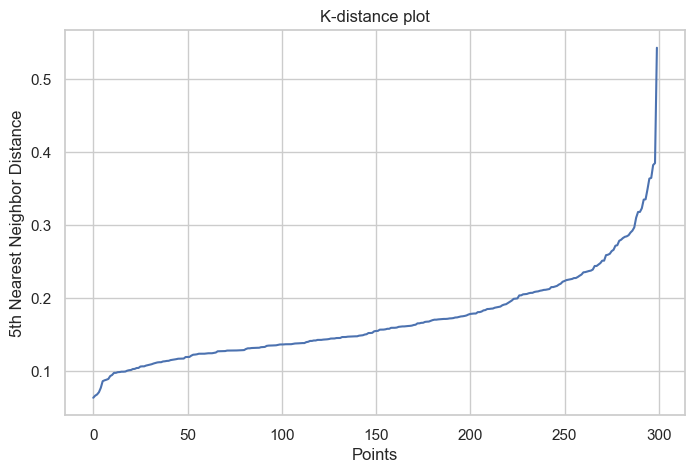

In [48]:
# Graficar k-distance para eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])  # 4 porque min_samples=5 normalmente

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance plot')
plt.xlabel('Points')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()


In [49]:
# Definir DBSCAN
dbscan_model = DBSCAN(eps=0.3, min_samples=5)  # Ajusta eps según tu caso

# Aplicar tu función
labels = cluster(dbscan_model, X_scaled, method='DBSCAN')


Model Report
DBSCAN

Number of clusters: 2

Silhouette Coefficient: 0.250


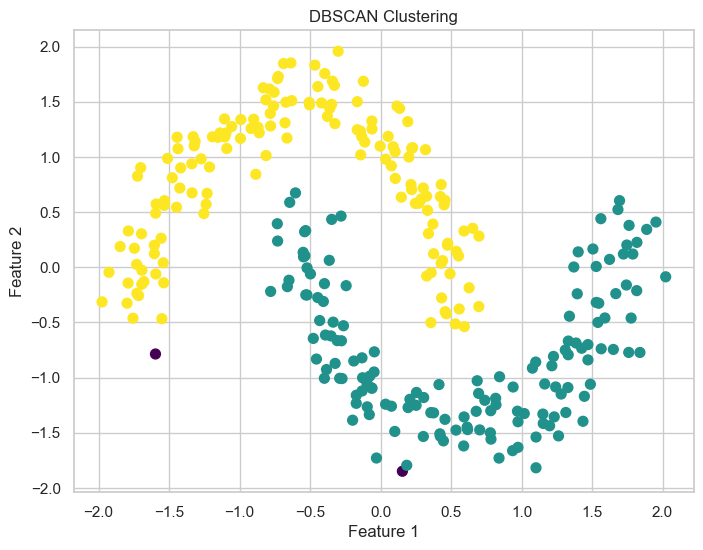

In [50]:
# Graficar los clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Relaciones

In [51]:
df.columns

Index(['nbi', 'log_pop', 'log_auo', 'log_crts', 'log_edi', 'log_dt', 'log_ct',
       'log_ds', 'log_cs', 'log_viirs', 'log_edu', 'log_icl', 'ndvi', 'mndwi'],
      dtype='object')

In [52]:
# Preparar agrupadores
df['intervalo_virss'] = pd.qcut(df['log_viirs'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

df['intervalo_icl'] = pd.qcut(df['log_icl'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

df['intervalo_auo'] = pd.qcut(df['log_auo'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

df['intervalo_edi'] = pd.qcut(df['log_edi'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

df['intervalo_ctrs'] = pd.qcut(df['log_crts'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

df['intervalo_ct'] = pd.qcut(df['log_ct'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

df['intervalo_nbi'] = pd.qcut(df['nbi'], q=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'
])

C:\Users\Michael\AppData\Local\Temp\ipykernel_17644\1502351059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intervalo_virss'] = pd.qcut(df['log_viirs'], q=5, labels=[
C:\Users\Michael\AppData\Local\Temp\ipykernel_17644\1502351059.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intervalo_icl'] = pd.qcut(df['log_icl'], q=5, labels=[
C:\Users\Michael\AppData\Local\Temp\ipykernel_17644\1502351059.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

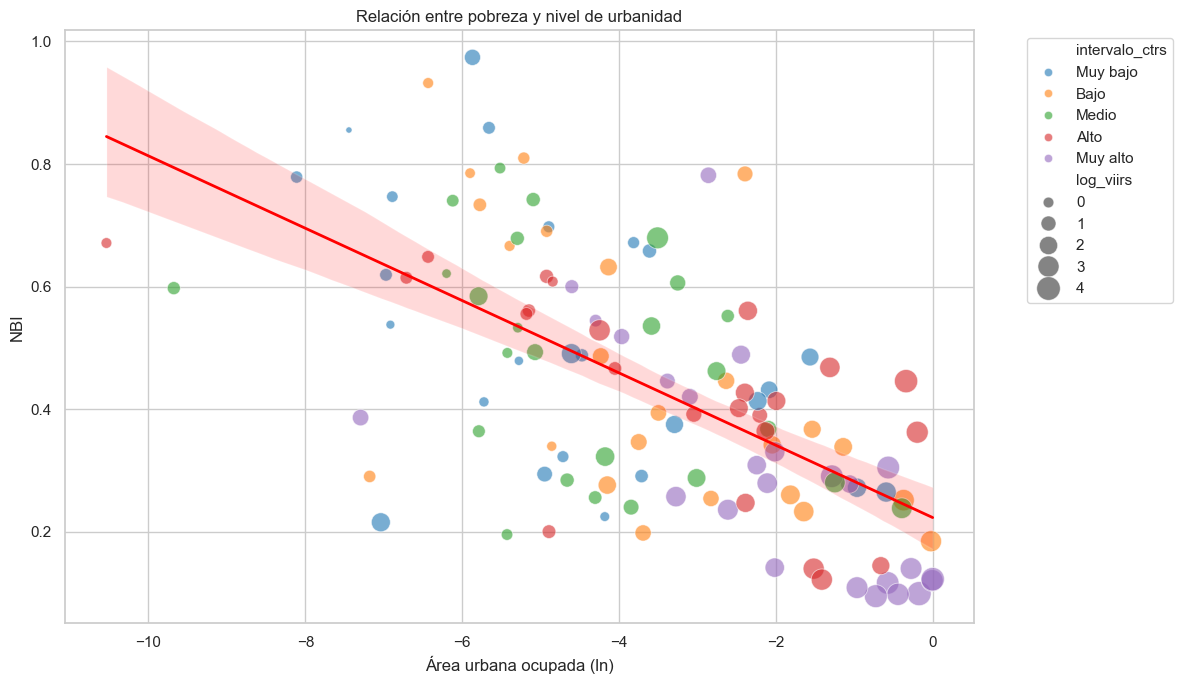

In [53]:
# Crear el scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df,
    x='log_auo',
    y='nbi',
    size='log_viirs',
    hue='intervalo_ctrs',  # Colorea por provincia
    sizes=(20, 300),
    alpha=0.6,
    palette='tab10',  # Puedes cambiar esto por otro colormap como 'Set2', 'Dark2', etc.
    legend=True
)

# Línea de regresión global
sns.regplot(
    data=df,
    x='log_auo',
    y='nbi',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Área urbana ocupada (ln)')
plt.ylabel('NBI')
plt.title('Relación entre pobreza y nivel de urbanidad')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("efectos.png", dpi=300)
plt.show()

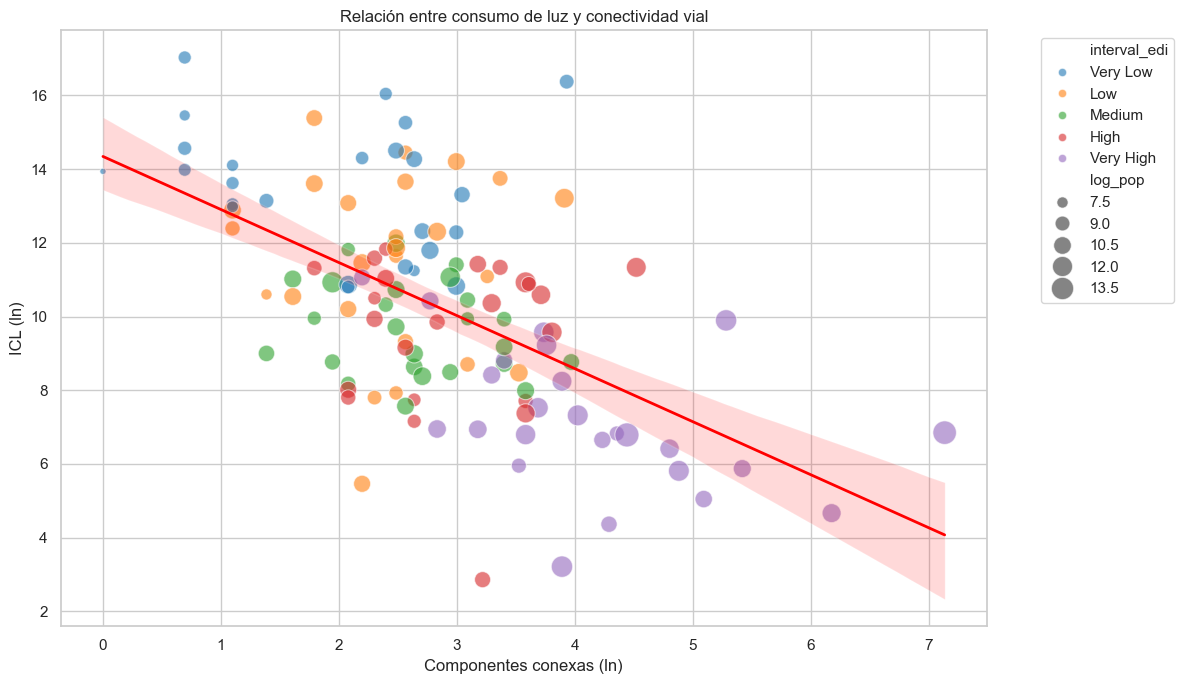

In [101]:
# Crear el scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df,
    x='log_ct',
    y='log_icl',
    size='log_pop',
    hue='intervalo_edi',  # Colorea por provincia
    sizes=(20, 300),
    alpha=0.6,
    palette='tab10',  # Puedes cambiar esto por otro colormap como 'Set2', 'Dark2', etc.
    legend=True
)

# Línea de regresión global
sns.regplot(
    data=df,
    x='log_ct',
    y='log_icl',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Estética
plt.xlabel('Componentes conexas (ln)')
plt.ylabel('ICL (ln)')
plt.title('Relación entre consumo de luz y conectividad vial')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("comConexas.png", dpi=300)
plt.show()

In [102]:
# Prepare groupers (quantile bins)
df['interval_viirs'] = pd.qcut(df['log_viirs'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

df['interval_icl'] = pd.qcut(df['log_icl'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

df['interval_auo'] = pd.qcut(df['log_auo'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

df['interval_edi'] = pd.qcut(df['log_edi'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

df['interval_ctrs'] = pd.qcut(df['log_crts'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

df['interval_ct'] = pd.qcut(df['log_ct'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])

df['interval_nbi'] = pd.qcut(df['nbi'], q=5, labels=[
    'Very Low', 'Low', 'Medium', 'High', 'Very High'
])


C:\Users\Michael\AppData\Local\Temp\ipykernel_17644\88444607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interval_viirs'] = pd.qcut(df['log_viirs'], q=5, labels=[
C:\Users\Michael\AppData\Local\Temp\ipykernel_17644\88444607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interval_icl'] = pd.qcut(df['log_icl'], q=5, labels=[
C:\Users\Michael\AppData\Local\Temp\ipykernel_17644\88444607.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

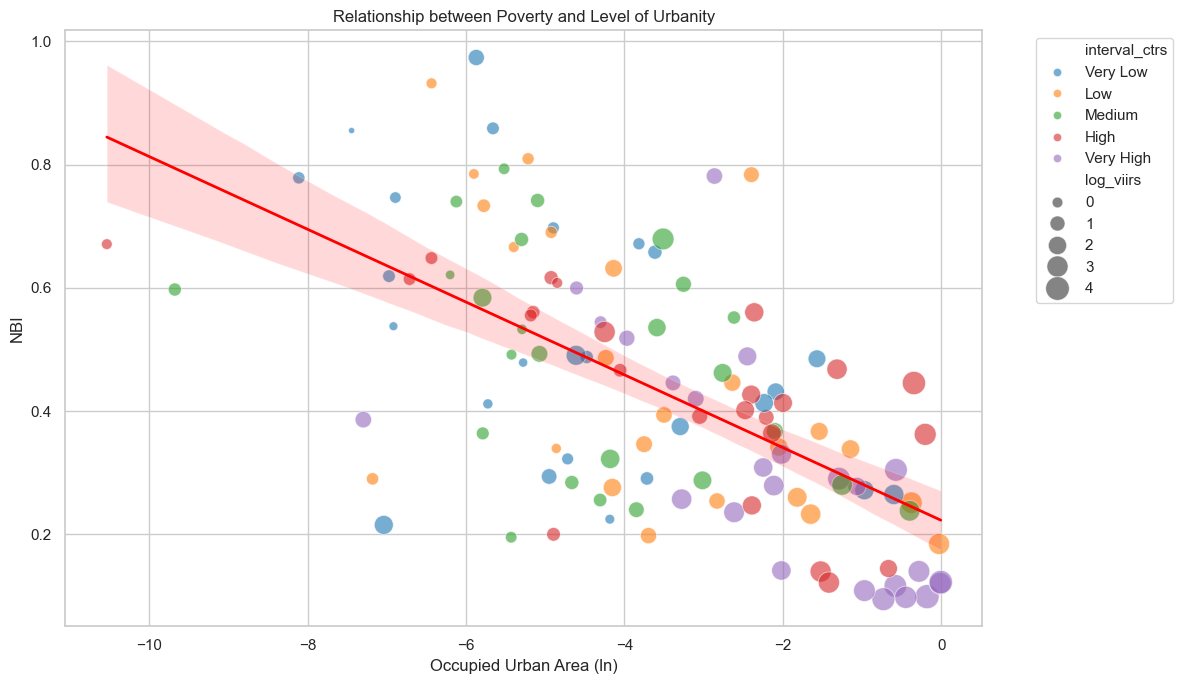

In [103]:
# Create the scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df,
    x='log_auo',
    y='nbi',
    size='log_viirs',
    hue='interval_ctrs',  # Color by province
    sizes=(20, 300),
    alpha=0.6,
    palette='tab10',  # You can change this to another colormap like 'Set2', 'Dark2', etc.
    legend=True
)

# Global regression line
sns.regplot(
    data=df,
    x='log_auo',
    y='nbi',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Aesthetics
plt.xlabel('Occupied Urban Area (ln)')
plt.ylabel('NBI')
plt.title('Relationship between Poverty and Level of Urbanity')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("efects.png", dpi=300)
plt.show()


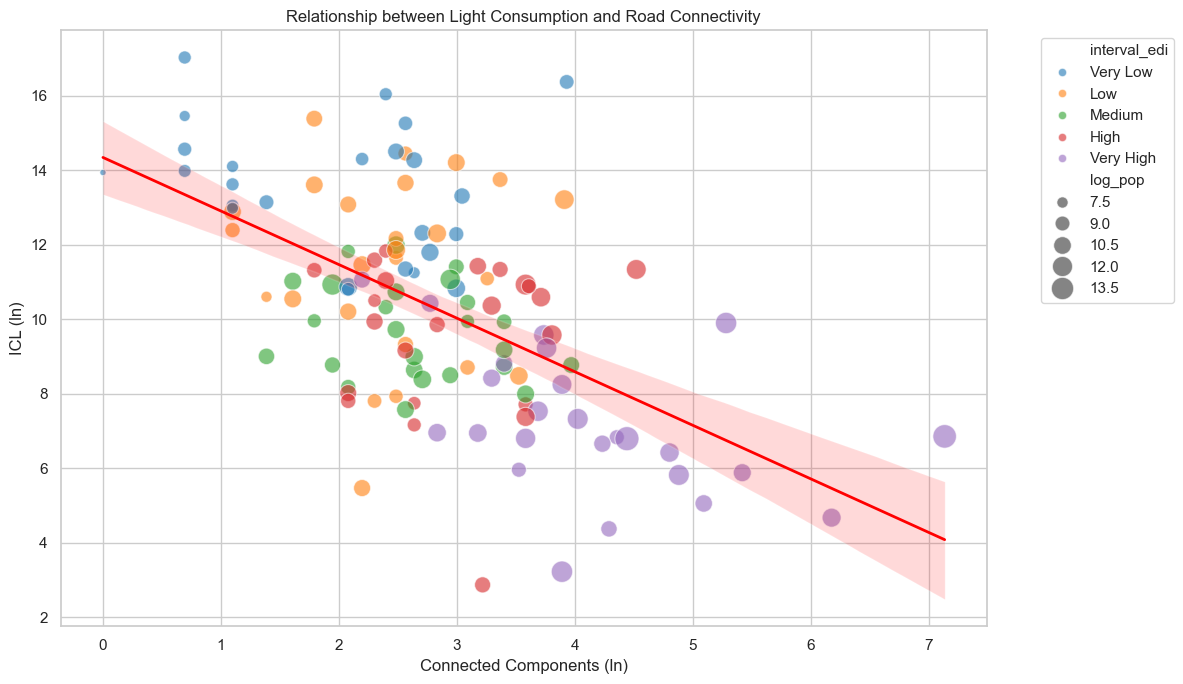

In [104]:
# Create the scatter plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df,
    x='log_ct',
    y='log_icl',
    size='log_pop',
    hue='interval_edi',  # Color by province
    sizes=(20, 300),
    alpha=0.6,
    palette='tab10',  # You can change this to another colormap like 'Set2', 'Dark2', etc.
    legend=True
)

# Global regression line
sns.regplot(
    data=df,
    x='log_ct',
    y='log_icl',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)

# Aesthetics
plt.xlabel('Connected Components (ln)')
plt.ylabel('ICL (ln)')
plt.title('Relationship between Light Consumption and Road Connectivity')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("comConexs.png", dpi=300)
plt.show()
